# Keras API implementation of CNNs


In [3]:
#Example of implementation of convolutional neural network
%matplotlib inline
import tensorflow as tf
from keras.models import Model
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D 
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")
# Define the input layer
input = Input(shape=(64, 64, 3))

# Define the layers
x = Conv2D(32, (3, 3), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
# outputs for 10 classes
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input, outputs=outputs)

# Display the model summary
model.summary()


2024-05-29 15:14:37.371039: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 15:14:37.395751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 15:14:37.395775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 15:14:37.396371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-29 15:14:37.401168: I tensorflow/core/platform/cpu_feature_guar

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856 

2024-05-29 15:14:38.439915: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 15:14:38.462158: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 15:14:38.462206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 15:14:38.464994: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-29 15:14:38.465030: I external/local_xla/xla/stream_executor

# CIFAR-10 dataset
https://www.cs.toronto.edu/~kriz/cifar.html

In [4]:
from keras.datasets import cifar10
#The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
# Checking the number of unique classes - 6000 images per class - balanced classification
import numpy as np

print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Show examples of images from the dataset

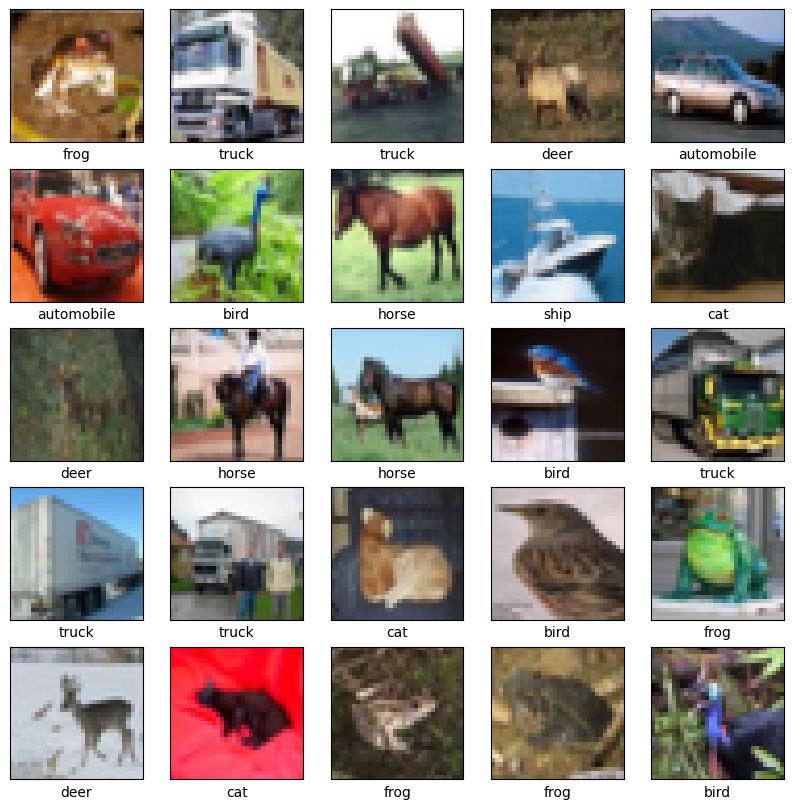

In [8]:
import matplotlib.pyplot as plt


CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
NUM_CLASSES = len(CLASSES)

#Exaples of images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25): 
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(CLASSES[y_train[i][0]])

plt.show()

## Data preprocessing

In [9]:
# Normalize data:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# encode 
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [10]:
# display tensors
x_train[0][1], y_train[0]

(array([[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.2       , 0.10588235, 0.03137255],
        [0.34509805, 0.2       , 0.08235294],
        [0.47058824, 0.32156864, 0.16862746],
        [0.5019608 , 0.34901962, 0.1764706 ],
        [0.49803922, 0.3372549 , 0.17254902],
        [0.49411765, 0.34117648, 0.19607843],
        [0.45490196, 0.30980393, 0.17254902],
        [0.41568628, 0.27450982, 0.14509805],
        [0.39607844, 0.2627451 , 0.13725491],
        [0.4117647 , 0.27450982, 0.14117648],
        [0.44313726, 0.2901961 , 0.13725491],
        [0.42745098, 0.27450982, 0.12941177],
        [0.4392157 , 0.28235295, 0.14509805],
        [0.46666667, 0.30980393, 0.17254902],
        [0.42745098, 0.2784314 , 0.12941177],
        [0.4117647 , 0.27058825, 0.10588235],
        [0.49019608, 0.34901962, 0.18039216],
        [0.49803922, 0.36078432, 0.18039216],
        [0.47843137, 0.33333334, 0

## Predicting with the deep neural network

In [26]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'leaky_relu')(x)
x = Dense(50, activation = 'relu')(x)


output_layer = Dense(10, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [27]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_7 (Dense)             (None, 200)               614600    
                                                                 
 dense_8 (Dense)             (None, 150)               30150     
                                                                 
 dense_9 (Dense)             (None, 50)                7550      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
Total params: 652810 (2.49 MB)
Trainable params: 652810 (2.

In [28]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.8856 - accuracy: 0.3133
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6881 - accuracy: 0.3925
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6027 - accuracy: 0.4273
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5534 - accuracy: 0.4444
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5099 - accuracy: 0.4600
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4780 - accuracy: 0.4728
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4529 - accuracy: 0.4798
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4281 - accuracy: 0.4911
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4061 - accuracy: 0.4973
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.

In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4556 - accuracy: 0.4873


[1.4555965662002563, 0.48730000853538513]

In [31]:
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 1s 2ms/step


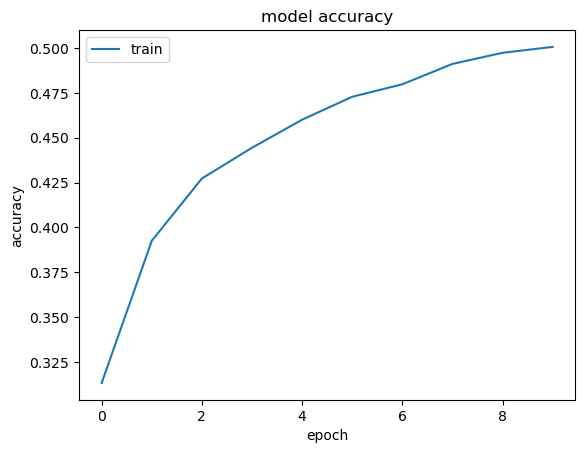

In [32]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

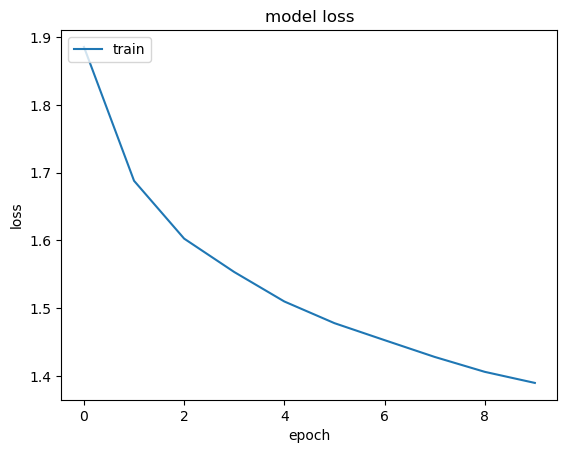

In [33]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

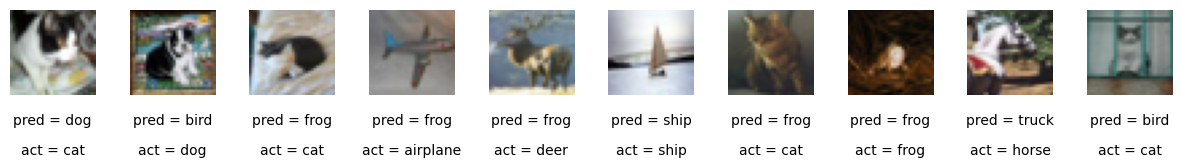

In [35]:
# Visualize predictions
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

#### 50% accuracy is really bad for Deep Neural Network. Try you can try training for more epochs.

## Understanding convolution: filters

In [36]:
# install !pip install -U scikit-image to visualize convolution

from skimage.color import rgb2gray


# convert image to gray 
im  =  rgb2gray(x_train[0])

# Define the filter values - horizontal edge filter
filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

In [37]:
new_image = np.zeros(im.shape)

# add the padding
im_pad = np.pad(im, 1, 'constant')

# convolution on the image: dot product
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

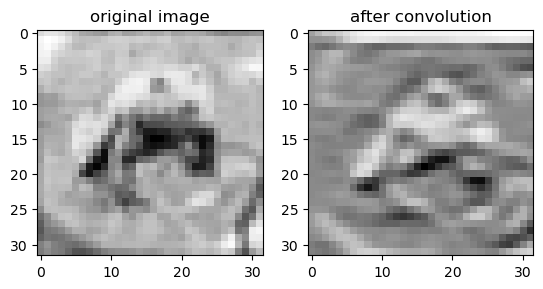

In [38]:
# plot the results 
plt.subplot(1, 2, 1)
plt.imshow(rgb2gray(x_train[0]),cmap='Greys')
plt.title("original image")
plt.subplot(1, 2, 2)
plt.title("after convolution")
plt.imshow(new_image, cmap='Greys')

In [39]:
# define the filter - vertical edge filter with stride 2

filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

# define the stride
stride = 2

In [40]:
new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

# add the padding
im_pad = np.pad(im,1, 'constant')

# convolution on the image with defined stide: dot product
for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

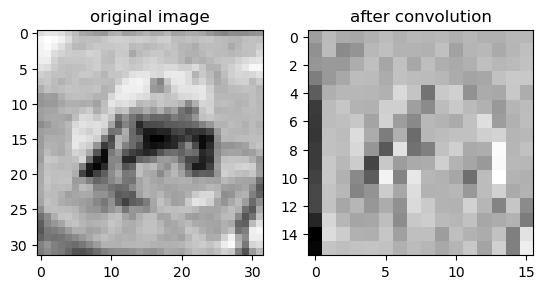

In [41]:
# plot the results 
plt.subplot(1, 2, 1)
plt.imshow(rgb2gray(x_train[0]),cmap='Greys')
plt.title("original image")
plt.subplot(1, 2, 2)
plt.title("after convolution")
plt.imshow(new_image, cmap='Greys')